In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

data = pd.read_csv('crx.data', header=None, na_values='?')

In [9]:
print(data.shape)
data.head()

(690, 16)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [13]:
data.columns = ['A' + str(i) for i in range(1, 16)] + ['class']
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [12]:
data['A5'][687]

'p'

In [14]:
data.describe()

,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [16]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print (categorical_columns)
print (numerical_columns)
data[categorical_columns].describe()

['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'class']
['A2', 'A3', 'A8', 'A11', 'A14', 'A15']


,A1,A4,A5,A6,A7,A9,A10,A12,A13,class
count,678,684,684,681,681,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,468,519,519,137,399,361,395,374,625,383


В таблице для каждого категориального признака приведено: 
**count** - общее число заполненных ячеек,
**unique** - количество значений, которые принимает данный признак
**top** - самое популярное (часто встречающееся) значение этого признака
**freq** - количество объектов, в которых встречается самое частое значение данного признака

Вот немного другой способ получить ту же информацию:

In [17]:
data.describe(include=[object])

,A1,A4,A5,A6,A7,A9,A10,A12,A13,class
count,678,684,684,681,681,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,468,519,519,137,399,361,395,374,625,383


In [20]:
for c in categorical_columns:
    print (c, ": ", data[c].unique())

A1 :  ['b' 'a' nan]
A4 :  ['u' 'y' nan 'l']
A5 :  ['g' 'p' nan 'gg']
A6 :  ['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' nan]
A7 :  ['v' 'h' 'bb' 'ff' 'j' 'z' nan 'o' 'dd' 'n']
A9 :  ['t' 'f']
A10 :  ['t' 'f']
A12 :  ['f' 't']
A13 :  ['g' 's' 'p']
class :  ['+' '-']


Функция **scatter_matrix** из модуля **pandas.tools.plotting** позволяет построить для каждой количественной переменной гистограмму, а для каждой пары таких переменных – диаграмму рассеяния:

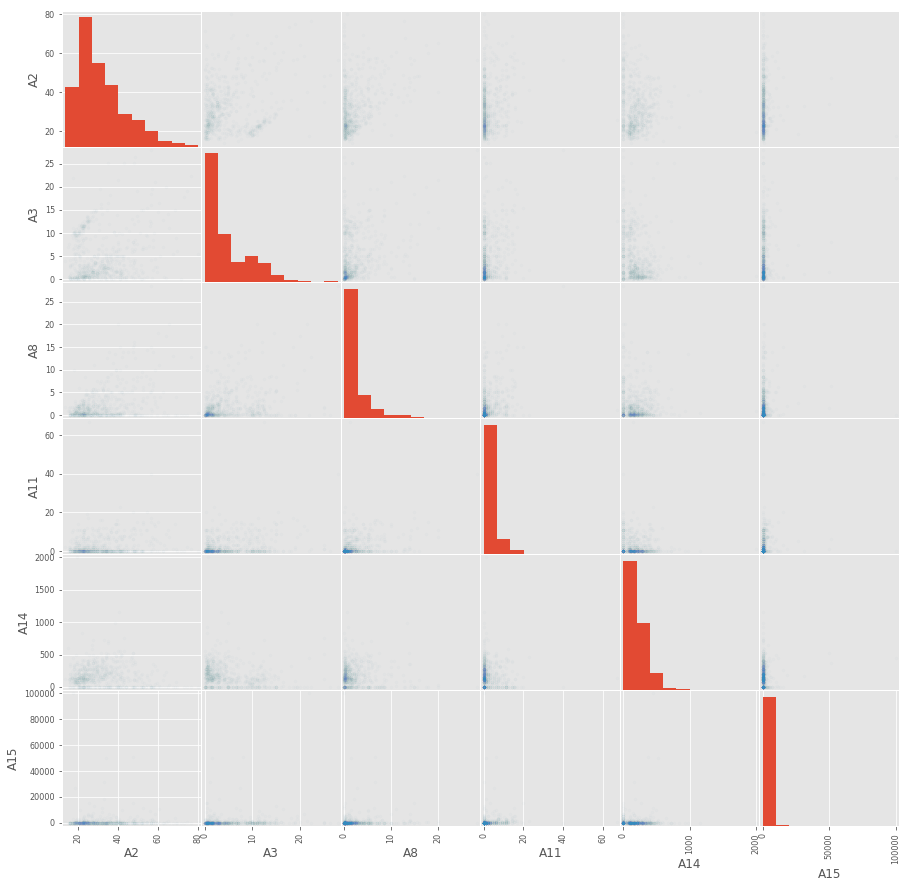

In [24]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, alpha=0.01, figsize=(15, 15));

In [25]:
data.corr()

,A2,A3,A8,A11,A14,A15
A2,1.000000,0.202317,0.395751,0.185912,-0.079812,0.018553
A3,0.202317,1.000000,0.298902,0.271207,-0.224242,0.123121
A8,0.395751,0.298902,1.000000,0.322330,-0.077163,0.051345
A11,0.185912,0.271207,0.322330,1.000000,-0.120096,0.063692
A14,-0.079812,-0.224242,-0.077163,-0.120096,1.000000,0.066853
A15,0.018553,0.123121,0.051345,0.063692,0.066853,1.000000


Можно выбрать любую пару признаков и нарисовать диаграмму рассеяния для этой пары признаков, изображая точки, соответствующие объектам из разных классов разным цветом: + – красный, - – синий. Например, для пары признаков **A2**, **A11** получаем следующую диаграмму:

Из диаграммы, в частности, видно, что признак A11 является существенным: как правило, красные точки имеют большое значение этого признака, а синие – маленькое. Иными словами, визуально наблюдается хорошая корреляция между признаками A11 и class. Признак A2, напротив, несет гораздо меньше информации о принадлежности объекта интересующему нас классу.

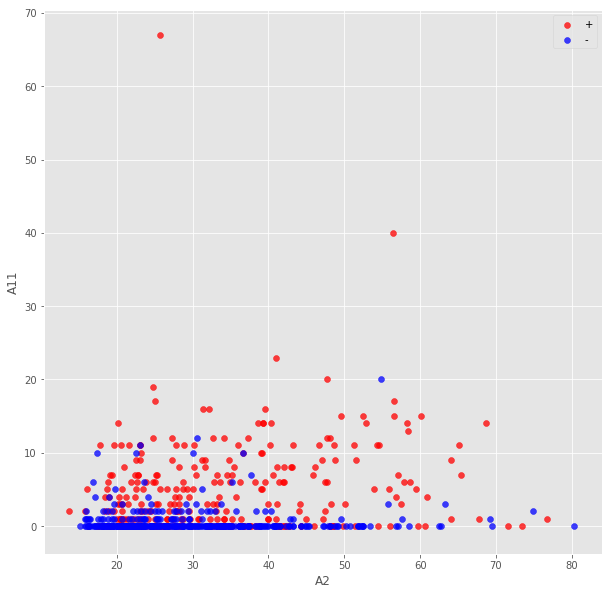

In [30]:
col1 = 'A2'
col2 = 'A11'

plt.figure(figsize=(10, 10))

plt.scatter(data[col1][data['class'] == '+'],
            data[col2][data['class'] == '+'],
            alpha=0.75,
            color='red',
            label='+')

plt.scatter(data[col1][data['class'] == '-'],
            data[col2][data['class'] == '-'],
            alpha=0.75,
            color='blue',
            label='-')

plt.xlabel(col1)
plt.ylabel(col2)
plt.legend(loc='best');

**Пропущенные значения**

Узнать количество заполненных (непропущенных) элементов можно с помощью метода count. Параметр axis = 0 указывает, что мы двигаемся по размерности 0 (сверху вниз), а не размерности 1 (слева направо), т.е. нас интересует количество заполненных элементов в каждом столбце, а не строке:

In [31]:
data.count(axis=0)

A1       678
A2       678
A3       690
A4       684
A5       684
A6       681
A7       681
A8       690
A9       690
A10      690
A11      690
A12      690
A13      690
A14      677
A15      690
class    690
dtype: int64

**Количественные признаки**
Заполнить пропущенные значения можно с помощью метода fillna. Заполним, например, медианными значениями.

axis=0 по-прежнему указывает, что мы двигаемся сверху вниз:

In [33]:
data = data.fillna(data.median(axis=0), axis=0)
data.count(axis=0)

A1       678
A2       690
A3       690
A4       684
A5       684
A6       681
A7       681
A8       690
A9       690
A10      690
A11      690
A12      690
A13      690
A14      690
A15      690
class    690
dtype: int64

In [34]:
data['A1'].describe()

count     678
unique      2
top         b
freq      468
Name: A1, dtype: object

In [35]:
data['A1'] = data['A1'].fillna('b')

In [36]:
data_describe = data.describe(include=[object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [41]:
data.describe(include=[object])

,A1,A4,A5,A6,A7,A9,A10,A12,A13,class
count,690,690,690,690,690,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,480,525,525,146,408,361,395,374,625,383


In [42]:
data.describe()

,A2,A3,A8,A11,A14,A15
count,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000
mean,31.514116,4.758725,2.223406,2.40000,183.562319,1017.385507
std,11.860245,4.978163,3.346513,4.86294,172.190278,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,80.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,37.707500,7.207500,2.625000,3.00000,272.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


Как уже отмечалось, библиотека scikit-learn не умеет напрямую обрабатывать категориальные признаки. Поэтому прежде чем подавать данные на вход алгоритмов машинного обучения преобразуем категориальные признаки в количественные.

Категориальные признаки, принимающие два значения (т.е. бинарные признаки) и принимающие большее количество значений будем обрабатывать по-разному.

Вначале выделим бинарные и небинарные признаки:

In [44]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print (binary_columns, nonbinary_columns)

['A1', 'A9', 'A10', 'A12', 'class'] ['A4', 'A5', 'A6', 'A7', 'A13']
